In [1]:
from fuzzyART_gai import *
from handytools import *
import sklearn.datasets as ds
import matplotlib.pyplot as plt
from kit_painting import *

In [2]:
iris = ds.load_iris()
data = iris['data'] / np.max(iris['data'], axis=0)
label_true = iris['target']
pca_painter = PaintPCA(data)

Variance explained by first 2 principal components: [0.92138578 0.05142129]


0.0
figure saved at _simcache/2022-03-30_17-01-10_var_rho0
0.1
figure saved at _simcache/2022-03-30_17-01-11_var_rho10
0.2
figure saved at _simcache/2022-03-30_17-01-12_var_rho20
0.30000000000000004
figure saved at _simcache/2022-03-30_17-01-13_var_rho30
0.4
figure saved at _simcache/2022-03-30_17-01-13_var_rho40
0.5
figure saved at _simcache/2022-03-30_17-01-14_var_rho50
0.6000000000000001
figure saved at _simcache/2022-03-30_17-01-15_var_rho60
0.7000000000000001
figure saved at _simcache/2022-03-30_17-01-16_var_rho70
0.8
Category 11 is too small
figure saved at _simcache/2022-03-30_17-01-17_var_rho80
0.9
Category 20 is too small
Category 28 is too small
Category 29 is too small
figure saved at _simcache/2022-03-30_17-01-18_var_rho90
1.0
Category 0 is too small
Category 1 is too small
Category 2 is too small
Category 3 is too small
Category 4 is too small
Category 5 is too small
Category 6 is too small
Category 7 is too small
Category 8 is too small
Category 9 is too small
Category 10

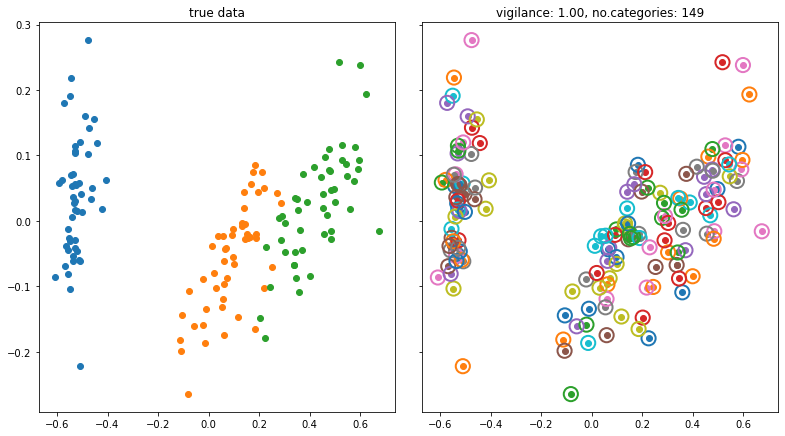

In [3]:
no_rho = 11
ls_rho = np.linspace(0, 1, no_rho)
fig, axs = plt.subplots(1, 2,
                        figsize = (11, 6), sharex=True, sharey=True)
fig.tight_layout()

# plot true data
pca_painter.scatter(axs[0], label_true)
axs[0].set_title("true data")

for rho in ls_rho: 
    print(rho)
    
    axs[1].clear()
    # init
    net = FuzzyARTgai(alpha=0.5, rho=rho)
    
    # train
    net.train(data, epochs=100) # each epoch, all data is shuffled
    label_pred = net.test(data).astype(int)

    # plot
    # pred
    pca_painter.scatter(axs[1], label_pred, data)
    
    # bipole and centre
    pca_painter.tripole(axs[1], *net.getcat_bipole())
    
    # boundary    
    axs[1].set_prop_cycle(None)
    pca_painter.boundary(axs[1], net.getcat_vertex())
    
    # info
    cat_number = net.w.shape[0]
    axs[1].set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))
    
    # save fig
    simname = 'var_rho{:d}'.format(int(rho*100))
    dirname = '_simcache'
    savefigure_datetime(fig, simname, dirname)